In [1]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

In [2]:
# General imports
import os
import tensorflow as tf
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-07-25 12:50:57.090413: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-07-25 12:50:57.115936: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-07-25 12:50:57.116129: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-07-25 12:50:57.117553: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-07-25 12:50:57.119187: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-07-25 12:50:57.119391: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

# Scratch

## Test 0

In [ ]:
num = 0
reps = 100
N = 10**6

mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 1

In [ ]:
num = 1
reps = 100
N = 10**6

b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg = 2*np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg)
sgnl = stats.multivariate_normal(mu_sgnl, sg)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 2

In [ ]:
num = 2
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 3

In [ ]:
num = 3
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 4

In [ ]:
num = 4
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

# Performance

In [4]:
reps = 100

bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

In [113]:
g = np.meshgrid(np.linspace(-2, 2, 401), np.linspace(-2, 2, 401))
g = np.append(g[0].reshape(-1,1), g[1].reshape(-1,1), axis = 1)

In [114]:
x = np.linspace(-2, 2, 4001)
y = np.linspace(-2, 2, 4001)
xx, yy = np.meshgrid(x, y)

pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

## Test 0

### Load

In [51]:
num = 0
N = 10**6

mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

2022-07-25 13:04:56.864093: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-07-25 13:04:56.874313: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2994530000 Hz
2022-07-25 13:04:56.875683: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ea7c44f040 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-25 13:04:56.875717: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-07-25 13:04:56.996897: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ea7c4b8f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-07-25 13:04:56.996963: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2022-07-25 13:04:56.999102: I 

### Visualize Distribution

In [52]:
mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

In [53]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [54]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.9996502, 0.9998713)

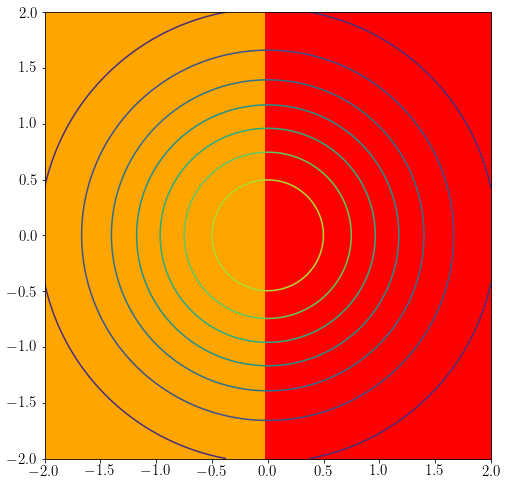

In [55]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### Error

In [56]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

2022-07-25 13:06:20.849533: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


MAEs
BCE:	 0.010608893415888216
MSE:	 0.010792345842649513
MLC:	 0.010777634692716996
SQR:	 0.0104678526596325


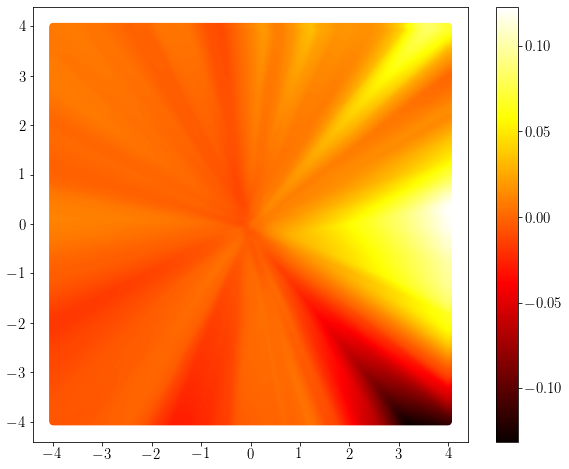

In [57]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

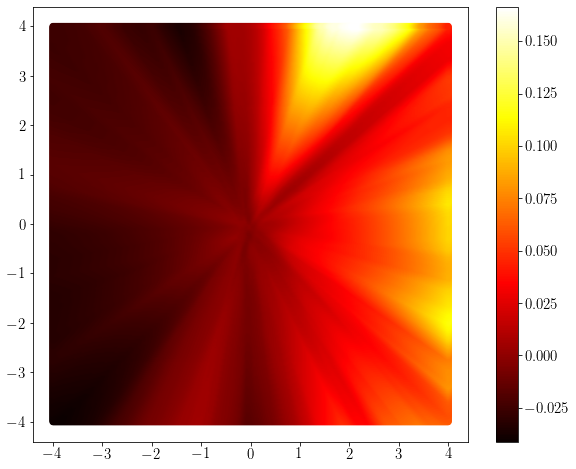

In [58]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

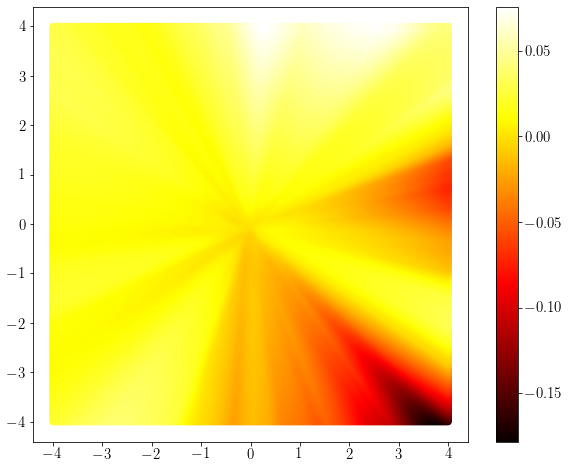

In [59]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

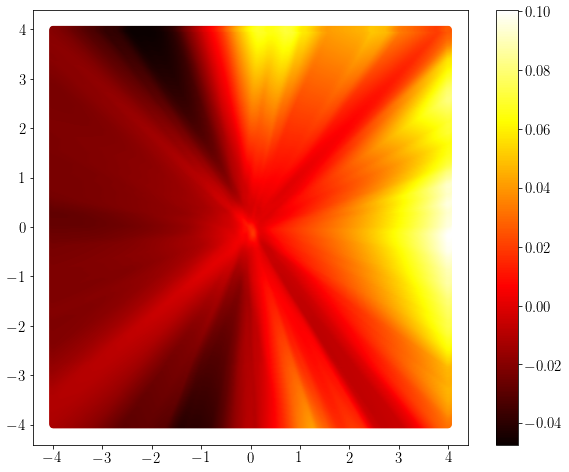

In [60]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 1

### Load

In [61]:
# Test 1
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])

bkgd = stats.multivariate_normal(mu_bkgd, sg)
sgnl = stats.multivariate_normal(mu_sgnl, sg)

num = 1

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [62]:
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])

bkgd = stats.multivariate_normal(mu_bkgd, sg)
sgnl = stats.multivariate_normal(mu_sgnl, sg)

In [63]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [64]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.9996498, 0.9998679)

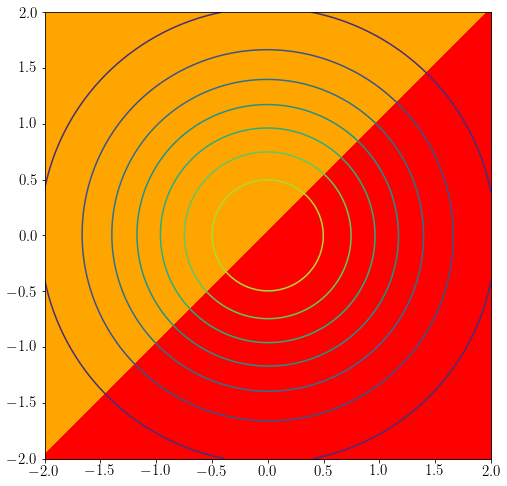

In [65]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### Error

In [66]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.05338995891526833
MSE:	 0.05399928400913013
MLC:	 0.0539026188864393
SQR:	 0.05363654681828417


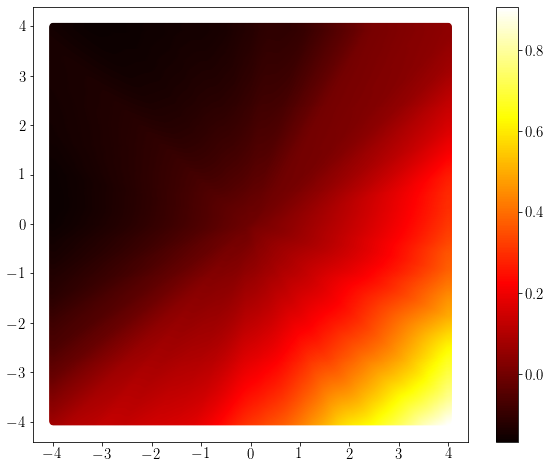

In [67]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

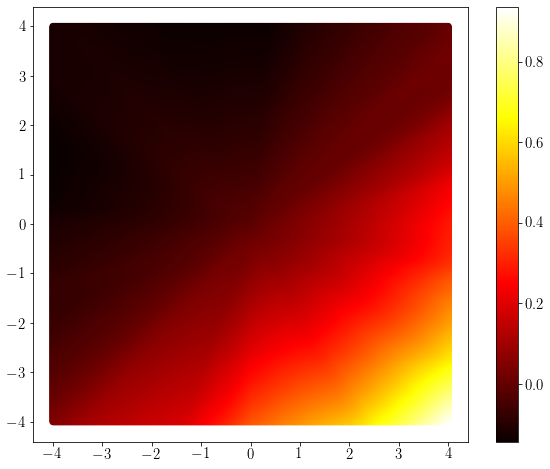

In [68]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

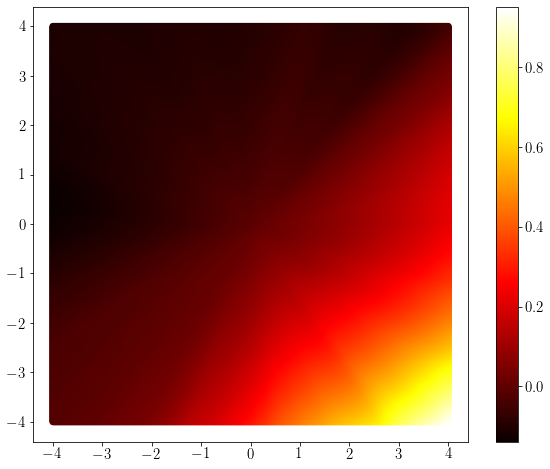

In [69]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

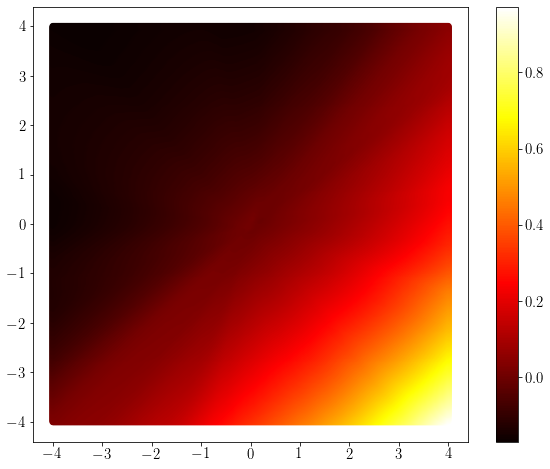

In [70]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 2

### Load

In [71]:
# Test 2
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 2

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [72]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [74]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [75]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.9905855, 0.99522815)

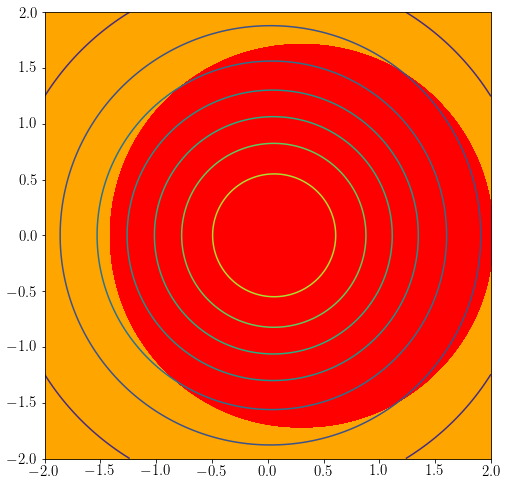

In [76]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### Error

In [77]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.15251256675897115
MSE:	 0.15928221645639773
MLC:	 0.1550325246797597
SQR:	 0.15210892075141924


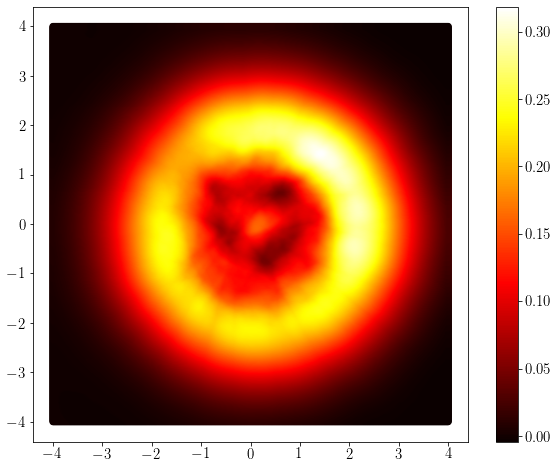

In [78]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

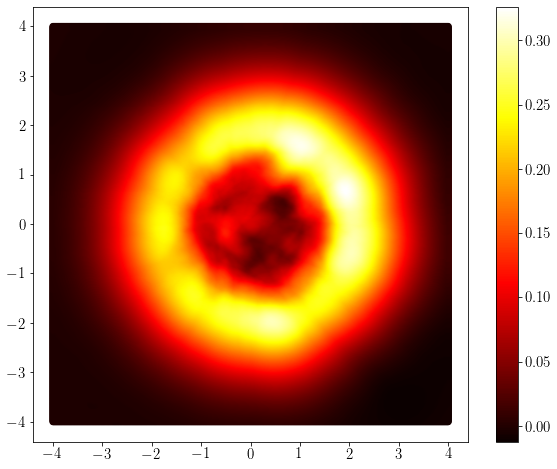

In [79]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

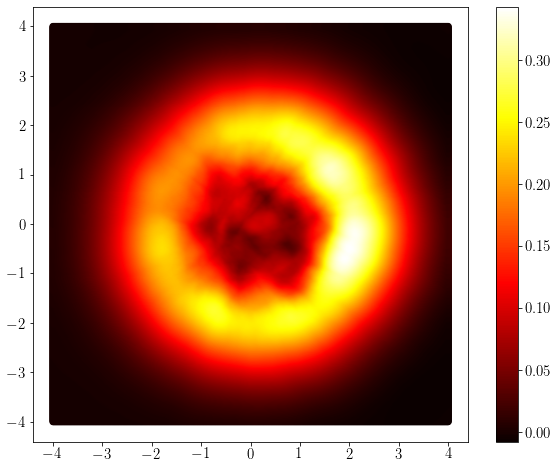

In [80]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

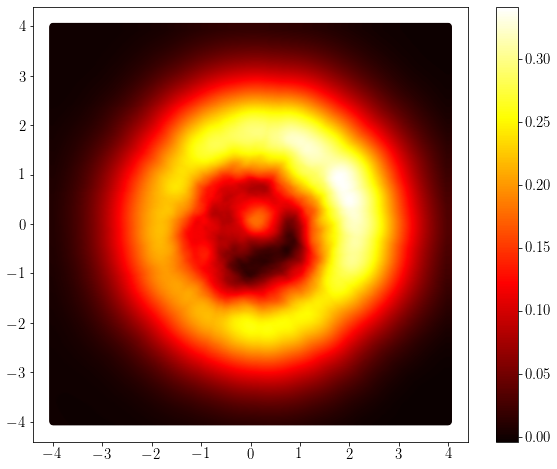

In [81]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 3

### Load

In [115]:
# Test 3
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 3

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [116]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [117]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [118]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.9928246, 0.99522065)

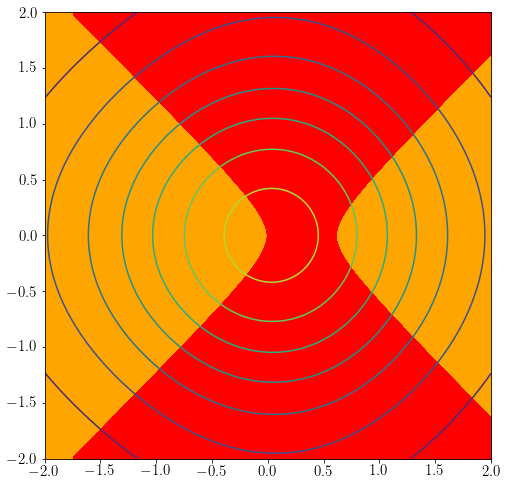

In [119]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### Error

In [120]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.7191185837219628
MSE:	 0.6578737066670172
MLC:	 1.1120948712152992
SQR:	 0.8024216336848834


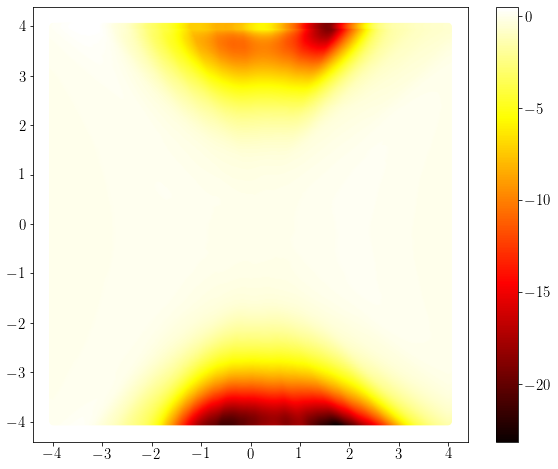

In [121]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

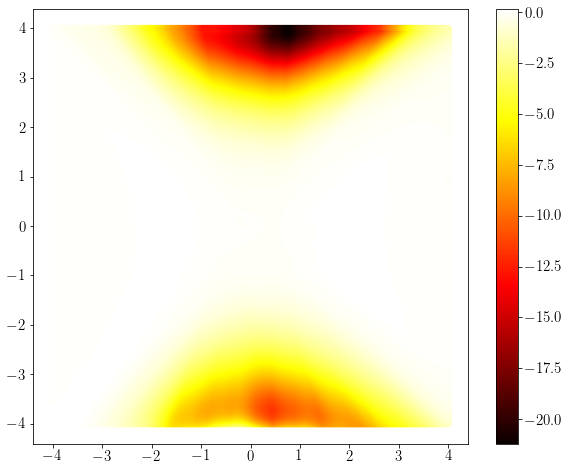

In [122]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

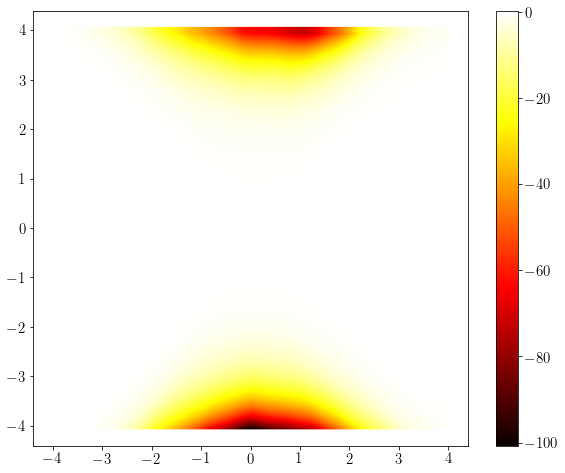

In [123]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

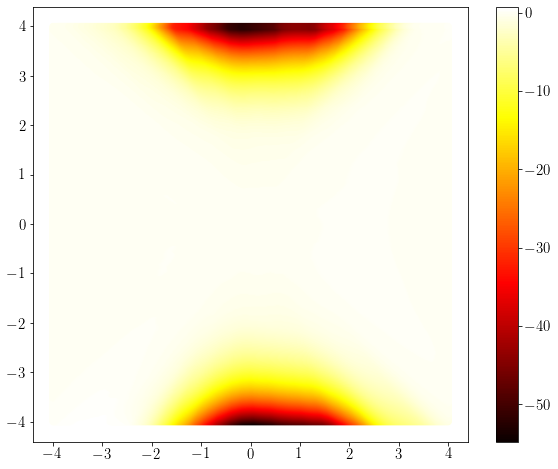

In [124]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 4

### Load

In [125]:
# Test 4

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 4

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [126]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [127]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [128]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.99223445, 0.9951952)

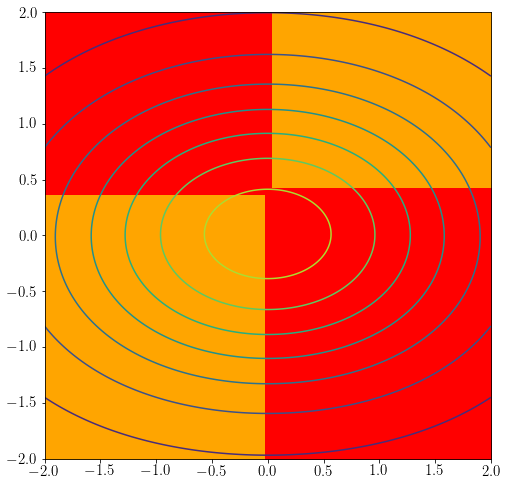

In [129]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### Error

In [130]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.11085303211260342
MSE:	 0.11032195175581756
MLC:	 0.11934435664366085
SQR:	 0.11341892499042538


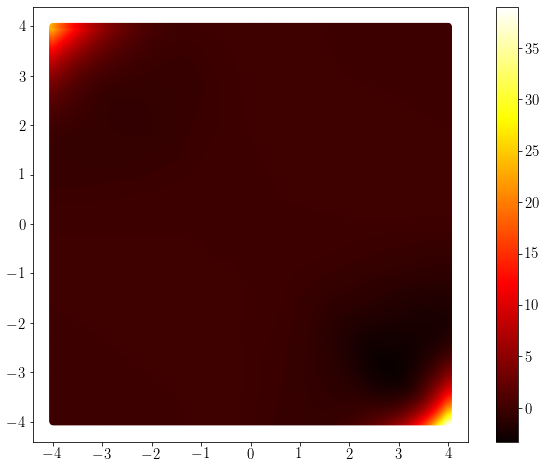

In [131]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

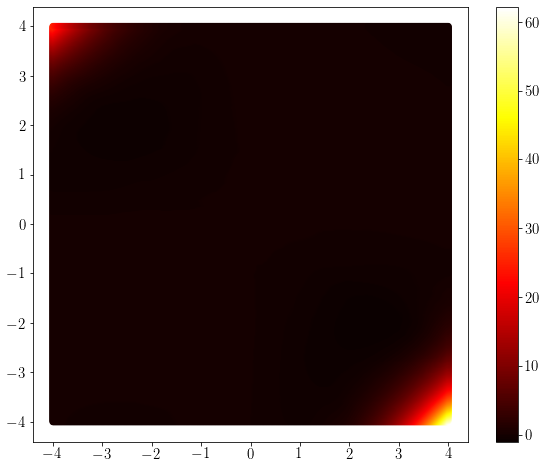

In [132]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

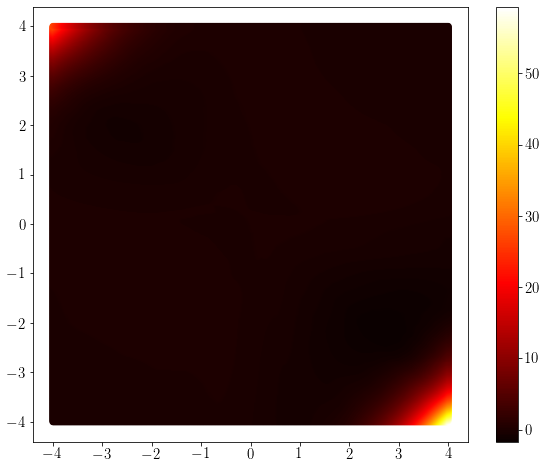

In [133]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

array([[-2.36916627e-02, -2.38999319e-02, -2.41085561e-02, ...,
         5.60386369e+01,  5.76786238e+01,  5.93607084e+01],
       [-2.36749096e-02, -2.38819387e-02, -2.40892805e-02, ...,
         5.44778317e+01,  5.60700341e+01,  5.76929225e+01],
       [-2.36547318e-02, -2.38604734e-02, -2.40664997e-02, ...,
         5.29518392e+01,  5.44890501e+01,  5.60500295e+01],
       ...,
       [ 2.56133533e+01,  2.50305397e+01,  2.44594764e+01, ...,
        -7.87351564e-02, -7.84999004e-02, -7.82675861e-02],
       [ 2.63559066e+01,  2.57548188e+01,  2.51611490e+01, ...,
        -7.85754882e-02, -7.83378718e-02, -7.80964011e-02],
       [ 2.71151588e+01,  2.64919691e+01,  2.58769781e+01, ...,
        -7.84096363e-02, -7.81696826e-02, -7.79259926e-02]])

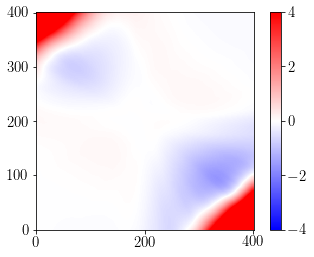

In [140]:
plt.pcolor(diffs.reshape(401, 401), cmap = 'bwr', vmin = -4, vmax = 4)
plt.colorbar()
plt.gca().set_aspect('equal')

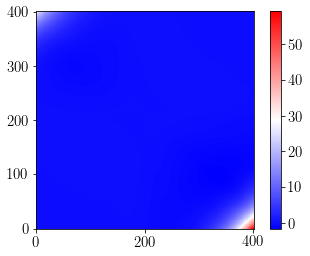

In [142]:
plt.pcolor(diffs.reshape(401, 401), cmap = 'bwr')
plt.colorbar()
plt.gca().set_aspect('equal')

In [ ]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')